<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>

**Integrantes:**  
* César Quiroz Mansilla 201573578-6 cesar.quirozm@sansano.usm.cl
* Jorge Contreras Cabrera 201573547-6 jorge.contrerasc@sansano.usm.cl


> Antes de comenzar se importan las librerias usadas en la resolución del taller 0

In [3]:
#Importaciones librerias usadas.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##  2. Job Salary Prediction

> a) Carge los datos *csv* de entrenamiento y cree un conjunto de validación con los últimos 10 mil datos en un dataframe de *pandas*. Describa los datos, apóyese de gráficos ¿Cuántos datos hay en cada conjunto?  

In [4]:
df = pd.read_csv("Train_rev1.csv")
df_train = df.iloc[:-10000]  #todo el conjunto menos los ultimos 10k
df_val = df.iloc[-10000:]    #ultimos 10k valores del conjunto
df_train2 = df.iloc[-15000:-10000]

In [11]:
df

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
5,13179816,Engineering Systems Analyst Water Industry,Engineering Systems Analyst Water Industry Loc...,"Dorking, Surrey, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20K to 30K,25000,cv-library.co.uk
6,14131336,Senior Subsea Pipeline Integrity Engineer,A globally renowned engineering and training c...,"Aberdeen, Borders",UK,NaN,permanent,Indigo 21 Ltd,Engineering Jobs,50000 - 100000/annum,75000,cv-library.co.uk
7,14663196,RECRUITMENT CONSULTANT INDUSTRIAL / COMMERCIA...,THIS IS A LIVE VACANCY NOT A GENERIC ADVERTISE...,"MANCHESTER, Greater Manchester",Manchester,NaN,permanent,Code Blue Recruitment,HR & Recruitment Jobs,18000 - 26000/annum TO 26K BASIC + COMM + BENS,22000,cv-library.co.uk
8,14663197,RECRUITMENT CONSULTANT CONSTRUCTION / TECHNIC...,This is an exceptional opportunity to join a c...,"LEEDS, West Yorkshire",Leeds,NaN,permanent,Code Blue Recruitment,HR & Recruitment Jobs,18000 - 28000/annum 18 - 28K BASIC + COMM + BENS,23000,cv-library.co.uk
9,15395797,Subsea Cables Engineer,A subsea engineering company is looking for an...,"Aberdeen, UK",Aberdeen,NaN,permanent,Indigo 21 Ltd,Engineering Jobs,70000 - 100000/annum,85000,cv-library.co.uk


In [17]:
print('Tipos de datos de cada columna\n',df.dtypes,'\n')
print('Cantidad de valores no nulos de cada columna\n',df.count(),'\n')
print('cantidad de valores presentes en el dataframe:',df.shape[0])

Tipos de datos de cada columna
 Id                     int64
Title                 object
FullDescription       object
LocationRaw           object
LocationNormalized    object
ContractType          object
ContractTime          object
Company               object
Category              object
SalaryRaw             object
SalaryNormalized       int64
SourceName            object
dtype: object 

Cantidad de valores no nulos de cada columna
 Id                    244768
Title                 244767
FullDescription       244768
LocationRaw           244768
LocationNormalized    244768
ContractType           65442
ContractTime          180863
Company               212338
Category              244768
SalaryRaw             244768
SalaryNormalized      244768
SourceName            244767
dtype: int64 

cantidad de valores presentes en el dataframe: 244768


Es posible observar que el dataset se encuentra compuesto por 12 columnas, siendo las columnas **Id** y **SalaryNormalized** las únicas que posee un valor númerico, todas las demás tienen strings. Las columnas presentes corresponden a:

- Id: Identificador del dato particular.
- Title: Nombre del empleo.
- FullDescription: Descripción del trabajo.
- LocationRaw: Lugar donde se realiza el trabajo.
- LocationNormalized: Lugar normalizado, se deja sólo la ciudad en cuestión.
- ContractType: Tipo de contrato, puede ser full_time o part_time.
- ContractTime: Duración del contrato, puede ser permanent o contract.
- Company: Compañía que ofrece el empleo.
- SalaryRow: Salario del empleo.
- SalaryNormalized: Salario normalizado como un valor entero.
- SourceName: fuente de donde se extrajo la infromación del empleo.

El dataset cuenta con 244768 datos, sin embargo, es posible observar que la columna ContratType sólo presenta 65442 datos no nulos.

Se construye el conjunto de validación solicitado con los últimos 10000 datos. Se crea el conjunto de entrenamiento con los datos restantes y también un conjunto de entrenamiento más pequeño, ya que el primero al ser demasiado extenso, genera tiempos de ejecución muy grandes. 

Luego, se procede a quitar las columnas de datos que no se encuentran normalizados, es decir, que no le entregan valor al analisis.

In [18]:
#Quitar filas que no estan normalizadas
# Conjunto validacion
del df_val['LocationRaw'] #Direccion en estado bruto
del df_val['SalaryRaw'] #salatio en estado bruto
del df_val['SourceName'] #Nombre de ka fuente innecesaria
del df_val['Title'] #todos tinen diferente valor

#Conjunto entrenamiento
del df_train['LocationRaw']
del df_train['SalaryRaw']
del df_train['SourceName']
del df_train['Title']

#conjunto de entrenamiento más pequeño
del df_train2['LocationRaw']
del df_train2['SalaryRaw']
del df_train2['SourceName']
del df_train2['Title']

Para poder analizar mejor los datos, se generarán gráficas que logren mostrar el comportamiento de estos, para eso, se genera un rango de los sueldos presentes en la data.

In [19]:
#Crear conjuntos de salarios.
largo_conjunto = 15000 #conjuntos de 15000 en 15000
c1=0
c2=0
c3=0
c4=0
c5=5
c6=0
c7=0
c8=0
c9=0
c10=0
for x in df_train.SalaryNormalized:
    if largo_conjunto >= x:
        c1=c1+1 
    elif(2*largo_conjunto) >= x:
        c2=c2+1
    elif (3*largo_conjunto) >= x:
        c3=c3+1
    elif(4*largo_conjunto) >= x:
        c4=c4+1
    elif (5*largo_conjunto) >= x:
        c5=c5+1
    elif (6*largo_conjunto) >= x:
        c6=c6+1
    elif (7*largo_conjunto) >= x:
        c7=c7+1
    elif (8*largo_conjunto) >= x:
        c8=c8+1
    elif (9*largo_conjunto)>=x:
        c9=c9+1
    else:
        c10=c10+1

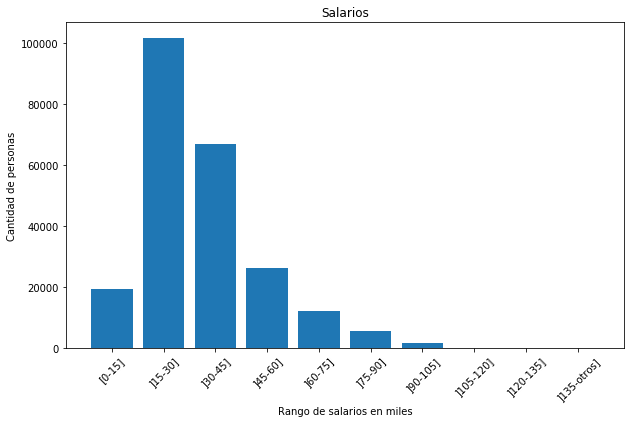

In [20]:
# Graficas

#Gráfico de barras de salarios por persona
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

eje_x=["[0-15]","]15-30]","]30-45]","]45-60]","]60-75]","]75-90]","]90-105]","]105-120]","]120-135]","]135-otros]"]
datos = [c1,c2,c3,c4,c5,c6,c7,c8,c9,c10]
X = np.arange(len(datos))
plt.figure(figsize=(10,6))
plt.bar(X, datos, align='center') #Widtth calibra grosor de las barras
ax =plt.axes()
ax.set_xticks(X)
ax.set_xticklabels(eje_x,rotation = 45)
plt.title("Salarios") #titulo
plt.xlabel('Rango de salarios en miles') #Nombre eje x
plt.ylabel('Cantidad de personas') #Nombre eje y
plt.show()


Este gráfico informa cuantas personas ganan cierto rango de dinero (cada rango es de 15000 dolares), con ello encontramos que casi la totalidad de la población gana entre 15000 y 45000 dolares.

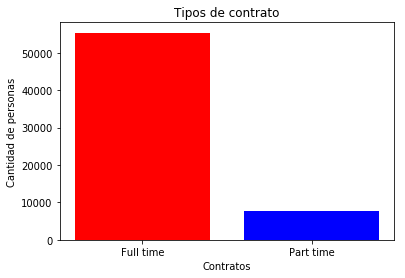

In [21]:
#Gráfico de barras de los tipos de contratos
eje_x=["Full time","Part time"]
X = np.arange(2)
plt.bar(X, df_train.ContractType.value_counts(), align='center',color=["r","b"])
ax =plt.axes()
ax.set_xticks(X)
ax.set_xticklabels(eje_x)
plt.title("Tipos de contrato") #titulo
plt.xlabel('Contratos') #Nombre eje x
plt.ylabel('Cantidad de personas') #Nombre eje y
plt.show()


Encontramos 2 tipos de personas contratadas full time y part time, aunque se observa que existe una cantidad mucho mayor de trabajadores full time, con esta información no puede concluirse nada, ya que sólo cerca de 60000 datos están representados en el gráfico de un universo de 230000 por lo tanto esta información no es relevante.

Se elimina la columna con los tipos de contrato.

In [22]:
#eliminar columna 'ContractType'
del df_val['ContractType']
del df_train['ContractType']
del df_train2['ContractType']

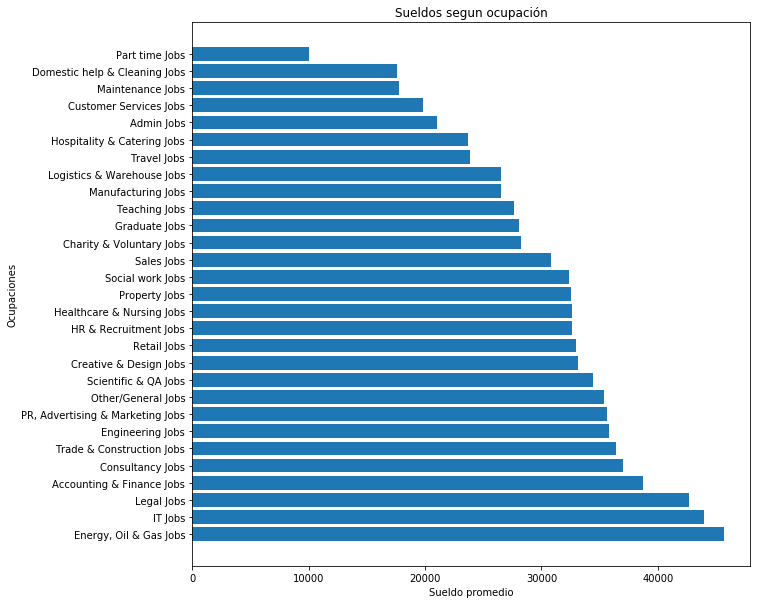

In [23]:
ct = df_val[pd.notnull(df_val['Category'])]
set1 = ct.Category.unique()
set1

jobs = df.groupby('Category', as_index=False)['SalaryNormalized'].mean()
jobs = jobs.sort_values('SalaryNormalized', ascending=False)
plt.figure(figsize=(10,10))
plt.barh(jobs.Category, jobs.SalaryNormalized)
plt.title("Sueldos segun ocupación") #titulo
plt.xlabel('Sueldo promedio') #Nombre eje x
plt.ylabel('Ocupaciones') #Nombre eje y
plt.show()



El gráfico anterior muestra la relación presente entre las ocupaciones de las personas con respecto al promedio del sueldo que estas ganan. Es posible observar que los valores varían desde los 10000 hasta valores más altos que 40000, aunque el menor, veáse "Part time jobs" se encuentra muy alejado de la media.

> b) Extraiga los datos de cada conjunto con los que trabajará, el *input* $X$, los textos, y el *output* $y$, los salarios.

In [24]:
text_train = df_train2.FullDescription
salary_train = df_train2.SalaryNormalized

text_val = df_val.FullDescription
salary_val = df_val.SalaryNormalized

Se extraen los valores de las columnas **FullDescription** y **SalaryNormalized** para el conjunto de entrenamiento y para el de validación.

> c) Realice un pre-procesamiento a los datos brutos de texto para extraer características y generar la representación de los datos de entrada al modelo $\vec{x}$. Comente sobre lo realizado.


In [26]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
def word_extractor1(text): #Estandariza las palabras
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
    text = re.sub('[/*]', '', text)
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower())for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words

def word_extractor2(text):
    wordstemmer = PorterStemmer()
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
    text = re.sub('[/*]', '', text)
    words = ""
    wordtokens = [ wordstemmer.stem(word.lower())for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


La función anterior tienen como función estandarizar los datos, dejando todas las letras en minúscula, y sacando caracteres que no le entregan valor a la información, como "/" o "*".

In [27]:

from sklearn.feature_extraction.text import CountVectorizer
texts_train = [word_extractor1(t) for t in text_train]
texts_val = [word_extractor1(t) for t in text_val]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

X_train = vectorizer.transform(texts_train)
X_val = vectorizer.transform(texts_val)

y_train = np.asarray(salary_train.astype(float))
y_val = np.asarray(salary_val.astype(float))

Se procesan los datos para poder ingresarlos más adelante a la función de regresión lineal mediante la función *CountVectorizer* de la librerı́a sklearn, la cual crea una representación vectorial del texto presente en **FullDescription**.

> d) Intente resolver el problema enfrentándolo como regresión con el modelo de regresión lineal ordinaria en *sklearn*. ¿Qué es lo que hace *fit_intercept=True*? Evalúe la función objetivo (F.O.) utilizada y la métrica de la competencia (*mean absolute error*) en ambos conjuntos generados en el punto a). Comente lo observado.

In [28]:
from sklearn.linear_model import LinearRegression as LR
model = LR(fit_intercept=True, normalize=False)
model = model.fit(X_train,y_train)

Se genera el modelo de regresión lineal de acuerdo a los valores del conjunto de entrenamiento.

In [29]:
from sklearn.metrics import mean_absolute_error #measure MAE
print("MAE on train: ",mean_absolute_error(y_train, model.predict(X_train)))
print("MAE on validation: ",mean_absolute_error(y_val, model.predict(X_val)))

MAE on train:  8.31231266575291
MAE on validation:  14813.684156172916


Los valores que entrega MAE para el conjunto de entrenamiento es muy bajo, lo que indica un accuracy muy alto, pero para el conjunto de validación la métrica entrega un valor muchísimo mayor, llegando a ser una diferencia abismal, y si bien es esperado que exista una diferencia entre ambos, el hecho de que sea tan grande indica que el modelo puede ser perfeccionado.

> e) Intente mejorar sus resultados en base a la métrica de la competencia (MAE) sobre el conjunto de validación. Comente sobre lo realizado.  
*No se le pide que imite los resultados ganadores de la competencia (MAE de 3400), sino que mejore lo ya alcanzado siendo creativo.*
<div class="alert alert-warning"> HINT: Una opción es cambiar el *approach* de resolución desde regresión a casificación o trabajo sobre los datos (tal como limpiarlos).</div>

Para mejorar los resultados entregados por la métrica MAE, se trabaja con un clasificador lineal, la regresión logística. Su implementación viene dada, al igual que con la regresión lineal, con la libreía sklearn, y para definirla, ocupamos los mismos valores de entrenamiento que para la regresión lineal.

In [30]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2 = model2.fit(X_train,y_train)

In [31]:
from sklearn.metrics import mean_absolute_error
print("MAE on train: ",mean_absolute_error(y_train, model2.predict(X_train)))
print("MAE on validation: ",mean_absolute_error(y_val, model2.predict(X_val)))

MAE on train:  16.054
MAE on validation:  11138.3761


Es posible observar que si bien el valor que entrega la métrica MAE es mayor para el conjunto de entrenamiento, este aumento es mínimo en comparación con la disminución presente en el resultado de la métrica para el conjunto de validación, en donde misminuye más de 3000, por lo cual podemos concluir que corresponde a un modelo más adecuado que en anterior.

## 3. Linear Regression by hand

> a) Escriba una función que calcule la función de pérdida, error cuadrático medio (MSE - *mean squared error*), para un dato o para un conjunto de datos.

La función de perdida ECM de define como:
$$
Loss = \frac{1}{N} \sum_i^N ( Y_i - \hat{Y}_i )^2
$$

Donde: 
* $Y$ es un vector de N valores verdaderos.
* $\hat{Y}$ es un vector con N prediciones.

In [32]:
x = [3,5,6] # vector de valoras verdaderos.
y= [4,6,6] # vector de predicioes.
datos = np.array([y,x])

def ecm (x,y):
    resta=y-x
    cuadrado=resta**2
    loss=sum(cuadrado)/len(resta)
    return loss

perdida=ecm(datos[1],datos[0])
print("Resultado fucion de perdida de prueba para un conjunto de datos: ",perdida)

Resultado fucion de perdida de prueba para un conjunto de datos:  0.6666666666666666


> b) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior, para un dato o para un conjunto de datos. *Escriba explícitamente la derivada (gradiente)*.

Teniendo ya la gradiente o derivada como:
$$
    \frac{\partial J}{\partial \beta_{n}} = 2 \sum^{n}_{i = 1} (\beta^{T} x_{i} - y_{i})x_{i}
$$

In [33]:
b=[1,1,1]
def derivada(x,y,b):
    return 2*sum(((np.transpose(b)*x)-y)*x)
a=derivada(datos[1],datos[0],1)
print("Resultado derivada de prueba: ", a)


Resultado derivada de prueba:  -16


> c) Escriba una función que calcule los parámetros de una regresión lineal simple de manera analítica (es decir el mínimo global). 

<div class="alert alert-warning"> Hint: ésto debería ser la ecuación desglosada de la derivada igual a 0, la cual incluye $(X^TX)^{-1}$</div>

* Regresión lineal ordinaria:
$$
\hat{y} = f(\vec{x}) =\vec{\beta}^T\cdot \vec{x}
$$

$$
   J(\beta_{n}) = (X\beta_{n} - Y)^{T} (X\beta_{n} - Y)
$$
Como derivada debe ser 0, se tiene:
$$
    \frac{\partial J}{\partial \beta_{n}} = 0 \rightarrow 2X^{T}(X\beta_{n} - Y) = 0
$$
Despejando B, se tiene:
$$
    \beta_{n} = (X^{T}X)^{-1}X^{T}Y
$$



In [34]:
def bn(x,y):
    return (np.transpose(x)*x)*-1*(np.transpose(x)*y)
a=bn(datos[1],datos[0])
print("Vector bn prueba es: ",a)

Vector bn prueba es:  [ -108  -750 -1296]


> d) Ahora escriba un programa que permita entrenar una regresión lineal a través del algoritmo SGD mostrado en la ecuación del algoritmo SGD, es decir, que de manera iterativa, vaya tomando un dato a la vez, y actualizando el parámetro $\beta$ a través del gradiente descendiente de la función de pérdida de la regresión lineal ordinaria, de la pregunta b).

* Algoritmo SGD para regresión lineal ordinaria:
$$ \vec{\beta}^{(t+1)} \leftarrow \vec{\beta}^{(t)} - \eta \nabla_{\vec{\beta}^{(t)}} Loss $$

* Teniendo ya la gradiente o derivada como:
$$
    \frac{\partial J}{\partial \beta_{n}} = 2 \sum^{n}_{i = 1} (\beta^{T} x_{i} - y_{i})x_{i}
$$
* Se puede definir la gradiente descendente como:
$$
    \beta_{t+1} = \beta_{t} - \eta_{t}\frac{\partial J}{\partial \beta_{n}}
$$
Para este caso:
$$
    \beta_{t+1} = \beta_{t} - \eta_{t}\ 2 \sum^{n}_{i = 1} (\beta^{T} x_{i} - y_{i})x_{i}
$$

In [35]:
b=[1,1,1]
b_f=b
n=0.5
def sgd(x,y,b,bf,n):
    cons=derivada(x,y,b)
    i=1
    while i < len(x):
        b_f[i]=b_f[(i-1)]-(n*cons)
        i=i+1
    return b_f
print("Algoritmo de prueba SGD: ",sgd(datos[1],datos[0],b,b_f,n))

Algoritmo de prueba SGD:  [1, 9.0, 17.0]


> e) Demuestre que sus programas funcionan en un problema de regresión simple. Para esto utilice el dataset **Boston Housing** , disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a el precio de diferentes casas en Boston además de distintas características relevantes respecto al lugar, como por ejemplo el crimen en la ciudad, el número de habitaciones, que tan vieja es, distancia a lugares relevantes, entre otros. Éstas características deben combinarse linealmente para estimar el precio de la casa.
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>

In [38]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
X_train,y_train = load_boston(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [39]:
lista=[]
x_train
#for x in x_train:
    # print(x)
 #   print("listas")

NameError: name 'x_train' is not defined